# GRIP @ The Sparks Foundation
## Task 2 : Prediction using UnSupervised Machine Learning
### Dataset: Iris dataset availablke in sklearn library , here I download it from kaggle
### Problem: Predict the optimum number of cluster and represent it visually
### Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib
## Presented by : Luminavathy

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import datasets
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# import dataset

iris=datasets.load_iris()
data=pd.read_csv("iris.data.csv", header=None)


In [3]:
# First 5 rows
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## Give name for the header 
data.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']


In [5]:
# last 5 rows
data.tail()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape ## 150 rows and 4 columns

(150, 5)

In [7]:
data.size # 600 elements are there in the iris dataset

750

In [8]:
# to see the statistics of the data
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# checking if any null values are there in column wise
data.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

In [10]:
# Since it has no null values 
## we can cross check by looking the column wise datapoints
data.notnull().sum()

Sepal_length    150
Sepal_width     150
Petal_length    150
Petal_width     150
Species         150
dtype: int64

In [11]:
# full summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# No. of duplicated rows
print("No of duplicated rows:", data.duplicated().sum())

No of duplicated rows: 3


# EDA

In [13]:
# Drop duplicate rows

data.drop_duplicates(inplace=True)
data.shape[0]  # gives number of rows simliarly we can check for number of columns using "data.shape[1]"

## number of rows are 149 before it is 150 since it deleted 1 duplicate row 

147

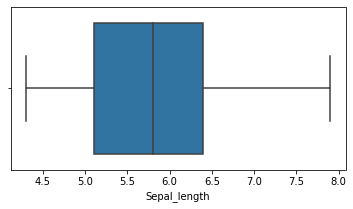

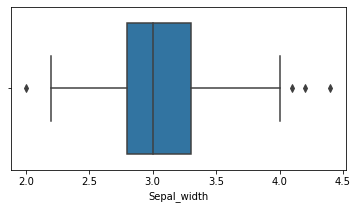

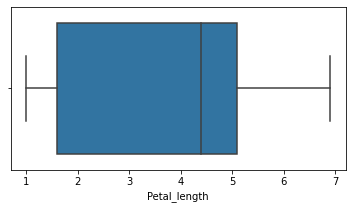

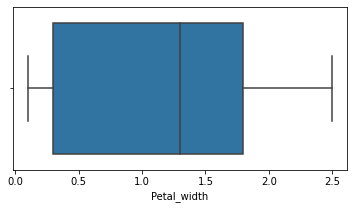

In [14]:
## check for the outliers in the numeric data
for i in data.columns:
    if data[i].dtype== "float64":
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()

In [17]:
# Treating the outliers present in the sepalWidthcm column
# IQR Rule 

q1,q3=np.percentile(data['Sepal_width'],[25,75])
iqr=q3-q1  #interquartile range
lower_fence=q1-(1.5*iqr) #lower boundary
upper_fence=q1+(1.5*iqr) #upper boundary
data['Sepal_width']= data['Sepal_width'].apply(lambda x: upper_fence if x> upper_fence
                                                        else lower_fence if x< lower_fence else x)

In [18]:
lower_fence

2.05

In [20]:
upper_fence

3.55

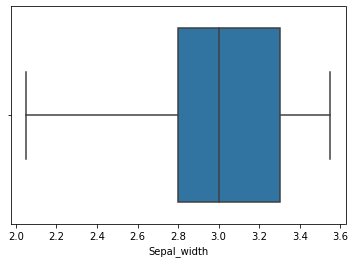

In [22]:
sns.boxplot(data['Sepal_width']);

### after restriction to IQR Rule no outliers are detected

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


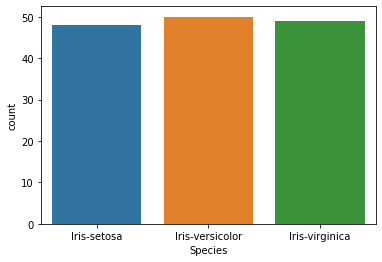

In [23]:
## Target Class
print(data.Species.value_counts())
sns.countplot(data.Species);

In [24]:
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.020068,3.780272,1.208844
std,0.829100,0.370193,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,3.550000,6.900000,2.500000


In [25]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

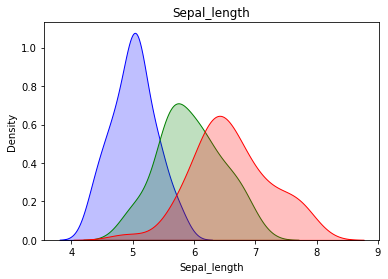

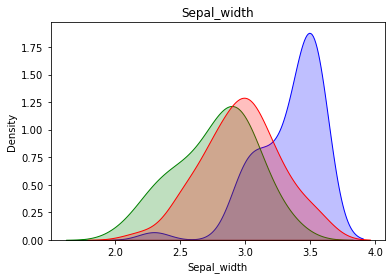

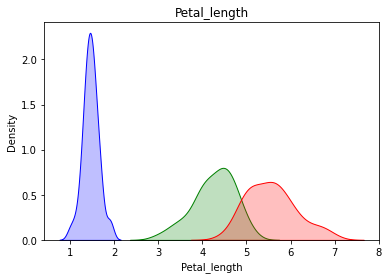

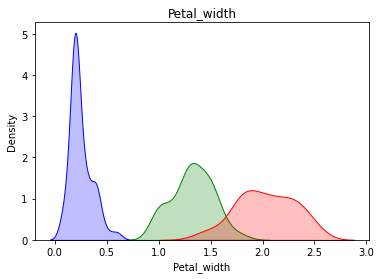

In [31]:
# Distribution of features by species

for i in data.columns[:-1]:
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-setosa'][i],label="Iris-setosa",shade=True, color="Blue")
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i],label="Iris-versicolor",shade=True, color="Green")
        
    sns.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i],label="Iris-virginica",shade=True, color="Red")
    
    plt.title(i);
    plt.show()

In [ ]:
#inference : We cannot distinguish between the species based on Sepal length / width
# but we can tell apart from the other species based on Petal length/width

In [32]:
## correlation matrix
data.corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.107485,0.871305,0.817058
Sepal_width,-0.107485,1.000000,-0.398486,-0.325818
Petal_length,0.871305,-0.398486,1.000000,0.961883
Petal_width,0.817058,-0.325818,0.961883,1.000000


<AxesSubplot:>

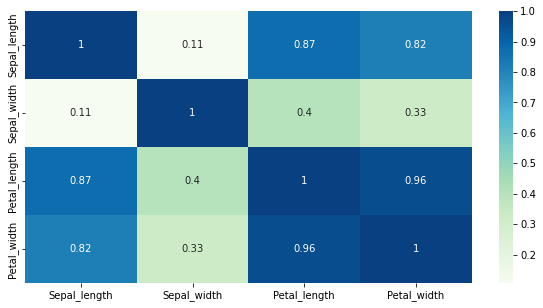

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='GnBu', annot=True)

In [ ]:
# Petal length and petal width are highly correlated

# K-Means Clustering

In [34]:
from sklearn.cluster import KMeans

## Elbow Method using within-cluster-sum-of-squares(sse)


In [38]:
SSE=[]
for i in range(1,10):
    kmeans=KMeans( n_clusters=i, init='k-means++' )
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

## Using Elbow graph to find optimum no. of Clusters


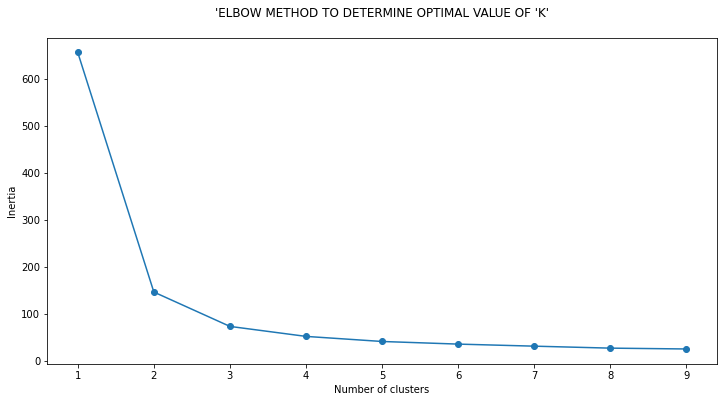

In [39]:
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");



### The optimum value for K would be 3. As we can see that with an increase in the number of clusters the SSE value decreases. We select the value for K on the basis of the rate of decrease in SSE and we can see that after 3 the drop in SSE is minimal.

## Initializing using k-means++ 

In [41]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_


array([[5.90327869, 2.75      , 4.38196721, 1.42622951],
       [5.01041667, 3.33229167, 1.4625    , 0.25      ],
       [6.85      , 3.05921053, 5.74210526, 2.07105263]])

In [42]:
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

In [43]:
data['cluster'] = kmeans.labels_

data


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,cluster
0,5.1,3.50,1.4,0.2,Iris-setosa,1
1,4.9,3.00,1.4,0.2,Iris-setosa,1
2,4.7,3.20,1.3,0.2,Iris-setosa,1
3,4.6,3.10,1.5,0.2,Iris-setosa,1
4,5.0,3.55,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,Iris-virginica,2
146,6.3,2.50,5.0,1.9,Iris-virginica,0
147,6.5,3.00,5.2,2.0,Iris-virginica,2
148,6.2,3.40,5.4,2.3,Iris-virginica,2


In [44]:
display(data['cluster'].value_counts(), data['Species'].value_counts())


0    61
1    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

## Visualizing the clusters

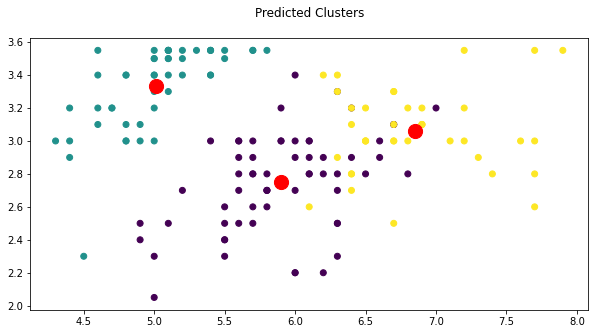

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(data['Sepal_length'], data['Sepal_width'], c=data.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='red', label = 'Centroids')
plt.show()


In [47]:
data.loc[data['Species']=='Iris-setosa']['cluster'].value_counts() ## the model has identified iris-setosa with 100% accuracy


1    48
Name: cluster, dtype: int64

In [49]:
data.loc[data['Species']=='Iris-versicolor']['cluster'].value_counts()


0    48
2     2
Name: cluster, dtype: int64

In [50]:
data.loc[data['Species']=='Iris-virginica']['cluster'].value_counts()


2    36
0    13
Name: cluster, dtype: int64

In [51]:
#label encoding for species

data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,cluster,Species_encoded
0,5.1,3.50,1.4,0.2,Iris-setosa,1,1
1,4.9,3.00,1.4,0.2,Iris-setosa,1,1
2,4.7,3.20,1.3,0.2,Iris-setosa,1,1
3,4.6,3.10,1.5,0.2,Iris-setosa,1,1
4,5.0,3.55,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,Iris-virginica,2,2
146,6.3,2.50,5.0,1.9,Iris-virginica,0,2
147,6.5,3.00,5.2,2.0,Iris-virginica,2,2
148,6.2,3.40,5.4,2.3,Iris-virginica,2,2


In [52]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))
 

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       1.00      1.00      1.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



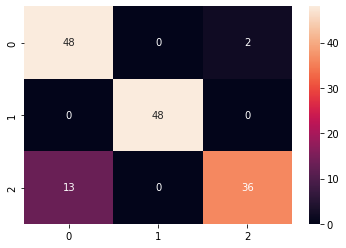

In [53]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']), annot=True);


# Conclusion

1. The bell curve of Iris Setosa ends roughly at 2.1
2. If petal length < 2.1, then species is Iris Setosa
3. The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8
4. If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor
5. If petal length > 4.8 then species is Iris Virginica